# **Download Data**

In [ ]:
!gdown 1Yh4-oBajQpMstZtm8-ZfbzUu0TA7G8S0
!gdown 12rD9Ct25EzFHq-QRkDhbbaKRk_jzEzkO
!gdown 1i7ssuu6eAgsgy7ZBwRfQuAyb2ryK0at5
!unzip /content/DerajatAlergi.zip
!unzip /content/foto-kulit-sehat.zip
!unzip /content/dataku-kulit-gasehat-acak.zip

# **Setup**

## -Libs

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from shutil import copyfile
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

## -Function

### --Choos Mono/Normal


*   normal dataset means only use allergy dataset and divide it in 3 class (degrees1, degrees2, degrees3)
*   mono dataset means all allergy dataset is only 1 class (allergy) plus other dataset become another class (non allergy)

In [ ]:
mono = True

### --The functions

In [ ]:
root_dir = '/content/dataset'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  path = os.path.join(root_path, "training")
  os.makedirs(path)
  path_1 = os.path.join(path, "d1")
  os.makedirs(path_1)
  path_2 = os.path.join(path, "d2")
  os.makedirs(path_2)
  path_2 = os.path.join(path, "d3")
  os.makedirs(path_2)
  path = os.path.join(root_path, "validation")
  os.makedirs(path)
  path_3 = os.path.join(path, "d1")
  os.makedirs(path_3)
  path_4 = os.path.join(path, "d2")
  os.makedirs(path_4)
  path_4 = os.path.join(path, "d3")
  os.makedirs(path_4)
def create_mono_train_val_dirs(root_path):
  path = os.path.join(root_path, "training")
  os.makedirs(path)
  path_1 = os.path.join(path, "non_alergi")
  os.makedirs(path_1)
  path_1 = os.path.join(path, "alergi")
  os.makedirs(path_1)
  path = os.path.join(root_path, "validation")
  os.makedirs(path)
  path_3 = os.path.join(path, "non_alergi")
  os.makedirs(path_3)
  path_3 = os.path.join(path, "alergi")
  os.makedirs(path_3)
try:
  # create_train_val_dirs(root_path=root_dir)
  create_mono_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  
  for filename in training_set:
    src_file = SOURCE_DIR + filename
    dest_file = TRAINING_DIR + filename
    copyfile(src_file, dest_file)
    
  for filename in testing_set:
    src_file = SOURCE_DIR + filename
    dest_file = VALIDATION_DIR + filename
    copyfile(src_file, dest_file)

# **Data Prep**

## -Split Val

In [ ]:
split_size = .85

## -Data Extraction

### --monodatset

In [ ]:
if mono:
  # Define paths
  d1_SOURCE_DIR = "/content/resultados/grau1/" #Data Alergi
  d2_SOURCE_DIR = "/content/resultados/grau2/" #Data Alergi
  d3_SOURCE_DIR = "/content/resultados/grau3/" #Data Alergi
  sehat_SOURCE = "/content/foto-kulit-sehat/" #Data Non Alergi
  gasehat_SOURCE = "/content/dataku-kulit-gasehat-acak/" #Data Non Alergi

  TRAINING_DIR = "/content/dataset/training/"
  VALIDATION_DIR = "/content/dataset/validation/"

  TRAINING_non_alergi_DIR = os.path.join(TRAINING_DIR, "non_alergi/")
  VALIDATION_non_alergi_DIR = os.path.join(VALIDATION_DIR, "non_alergi/")
  TRAINING_alergi_DIR = os.path.join(TRAINING_DIR, "alergi/")
  VALIDATION_alergi_DIR = os.path.join(VALIDATION_DIR, "alergi/")

  # Empty directories in case you run this cell multiple times
  if len(os.listdir(TRAINING_non_alergi_DIR)) > 0:
    for file in os.scandir(TRAINING_non_alergi_DIR):
      os.remove(file.path)
  if len(os.listdir(TRAINING_alergi_DIR)) > 0:
    for file in os.scandir(TRAINING_alergi_DIR):
      os.remove(file.path)
  if len(os.listdir(VALIDATION_non_alergi_DIR)) > 0:
    for file in os.scandir(VALIDATION_non_alergi_DIR):
      os.remove(file.path)
  if len(os.listdir(VALIDATION_alergi_DIR)) > 0:
    for file in os.scandir(VALIDATION_alergi_DIR):
      os.remove(file.path)

  # Define proportion of images used for training
  # Run the function
  # NOTE: Messages about zero length images should be printed out
  split_data(d1_SOURCE_DIR, TRAINING_alergi_DIR, VALIDATION_alergi_DIR, split_size)
  split_data(d2_SOURCE_DIR, TRAINING_alergi_DIR, VALIDATION_alergi_DIR, split_size)
  split_data(d3_SOURCE_DIR, TRAINING_alergi_DIR, VALIDATION_alergi_DIR, split_size)
  split_data(sehat_SOURCE, TRAINING_non_alergi_DIR, VALIDATION_non_alergi_DIR, split_size)
  split_data(gasehat_SOURCE, TRAINING_non_alergi_DIR, VALIDATION_non_alergi_DIR, split_size)

  # Check that the number of images matches the expected output
  # Your function should perform copies rather than moving images so original directories should contain unchanged images
  print(f"Original {d1_SOURCE_DIR} directory has {len(os.listdir(d1_SOURCE_DIR))} images")
  print(f"Original {d2_SOURCE_DIR} directory has {len(os.listdir(d2_SOURCE_DIR))} images")
  print(f"Original {d3_SOURCE_DIR} directory has {len(os.listdir(d3_SOURCE_DIR))} images")
  print(f"Original {sehat_SOURCE} directory has {len(os.listdir(sehat_SOURCE))} images")
  print(f"Original {gasehat_SOURCE} directory has {len(os.listdir(gasehat_SOURCE))} images")
  # Training and validation splits
  print(f"There are {len(os.listdir(TRAINING_alergi_DIR))} images of alergi for training")
  print(f"There are {len(os.listdir(VALIDATION_alergi_DIR))} images of alergi for validation")
  print(f"There are {len(os.listdir(TRAINING_non_alergi_DIR))} images of non alergi for training")
  print(f"There are {len(os.listdir(VALIDATION_non_alergi_DIR))} images of non alergi for validation")
else: print('You Are Set As Not Mono')

### --dataset

In [ ]:
if !mono:
  # Define paths
  d1_SOURCE_DIR = "/content/resultados/grau1/"
  d2_SOURCE_DIR = "/content/resultados/grau2/"
  d3_SOURCE_DIR = "/content/resultados/grau3/"

  TRAINING_DIR = "/content/dataset/training/"
  VALIDATION_DIR = "/content/dataset/validation/"

  TRAINING_d1_DIR = os.path.join(TRAINING_DIR, "d1/")
  VALIDATION_d1_DIR = os.path.join(VALIDATION_DIR, "d1/")

  TRAINING_d2_DIR = os.path.join(TRAINING_DIR, "d2/")
  VALIDATION_d2_DIR = os.path.join(VALIDATION_DIR, "d2/")

  TRAINING_d3_DIR = os.path.join(TRAINING_DIR, "d3/")
  VALIDATION_d3_DIR = os.path.join(VALIDATION_DIR, "d3/")

  # Empty directories in case you run this cell multiple times
  if len(os.listdir(TRAINING_d1_DIR)) > 0:
    for file in os.scandir(TRAINING_d1_DIR):
      os.remove(file.path)
  if len(os.listdir(VALIDATION_d1_DIR)) > 0:
    for file in os.scandir(VALIDATION_d1_DIR):
      os.remove(file.path)

  if len(os.listdir(TRAINING_d2_DIR)) > 0:
    for file in os.scandir(TRAINING_d2_DIR):
      os.remove(file.path)
  if len(os.listdir(VALIDATION_d2_DIR)) > 0:
    for file in os.scandir(VALIDATION_d2_DIR):
      os.remove(file.path)

  if len(os.listdir(TRAINING_d3_DIR)) > 0:
    for file in os.scandir(TRAINING_d3_DIR):
      os.remove(file.path)
  if len(os.listdir(VALIDATION_d3_DIR)) > 0:
    for file in os.scandir(VALIDATION_d3_DIR):
      os.remove(file.path)

  # Define proportion of images used for training

  # Run the function
  # NOTE: Messages about zero length images should be printed out
  split_data(d1_SOURCE_DIR, TRAINING_d1_DIR, VALIDATION_d1_DIR, split_size)
  split_data(d2_SOURCE_DIR, TRAINING_d2_DIR, VALIDATION_d2_DIR, split_size)
  split_data(d3_SOURCE_DIR, TRAINING_d3_DIR, VALIDATION_d3_DIR, split_size)

  # Check that the number of images matches the expected output

  # Your function should perform copies rather than moving images so original directories should contain unchanged images
  print(f"Original d1's directory has {len(os.listdir(d1_SOURCE_DIR))} images")
  print(f"Original d2's directory has {len(os.listdir(d2_SOURCE_DIR))} images")
  print(f"Original d3's directory has {len(os.listdir(d3_SOURCE_DIR))} images")

  # Training and validation splits
  print(f"There are {len(os.listdir(TRAINING_d1_DIR))} images of d1 for training")
  print(f"There are {len(os.listdir(VALIDATION_d1_DIR))} images of d1 for validation")

  print(f"There are {len(os.listdir(TRAINING_d2_DIR))} images of d2 for training")
  print(f"There are {len(os.listdir(VALIDATION_d2_DIR))} images of d2 for validation")

  print(f"There are {len(os.listdir(TRAINING_d3_DIR))} images of d3 for training")
  print(f"There are {len(os.listdir(VALIDATION_d3_DIR))} images of d3 for validation")
else: print('You Are Set As Mono')

Original d1's directory has 415 images
Original d2's directory has 445 images
Original d3's directory has 369 images
There are 332 images of d1 for training
There are 83 images of d1 for validation
There are 356 images of d2 for training
There are 89 images of d2 for validation
There are 295 images of d3 for training
There are 74 images of d3 for validation


### --Class Count

In [ ]:
dirs = ''
if mono:
  dirs = '/content/dataset/training'
else:
  dirs = TRAINING_d1_DIR
class_names = sorted(os.listdir(dirs))
class_length = len(class_names)
class_length

2

# **Training**

## -Hyper parameter

In [ ]:
# Hyperparameter
input_shape = (56,56)
batch_size = 32*2
learning_rate=0.001
dropout_layer_val = 0.5

rotation_range=45
width_shift_range=0.1
height_shift_range=0.1

fill_mode='nearest'

horizontal_flip=True
vertical_flip=True

rescale=1.0/255.0

loss_fun = 'categorical_crossentropy'
optimizer_fun = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)

## -TrainValGenerator

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator( rotation_range=rotation_range,
                                      width_shift_range=width_shift_range,
                                      height_shift_range=height_shift_range,
                                      fill_mode=fill_mode,
                                      horizontal_flip=horizontal_flip,
                                      vertical_flip=vertical_flip,
                                      rescale=rescale)
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=batch_size,
                                                      class_mode='categorical',
                                                      target_size=input_shape)

  validation_datagen = ImageDataGenerator(rescale=1/255)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=batch_size,
                                                                class_mode='categorical',
                                                                target_size=input_shape)
  return train_generator, validation_generator

## -RESET

In [ ]:
import os
import shutil

# os.listdir("/content/monodataset/training") #First find where the ".ipynb_checkpoints" is located.

shutil.rmtree("/content/dataset")
shutil.rmtree("/content/monodataset/validation/.ipynb_checkpoints")
shutil.rmtree("/content/monodataset/training/.ipynb_checkpoints")

FileNotFoundError: ignored

## -Model for Training

In [ ]:
print(TRAINING_DIR)
print(VALIDATION_DIR)
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

def create_model():
  ### START CODE HERE
  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(input_shape[0], input_shape[1], 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(dropout_layer_val),
      tf.keras.layers.Dense(class_length, activation='softmax')
  ])

  model.compile(loss=loss_fun,
                optimizer= optimizer_fun,
                metrics=['accuracy']) 
  return model
  
my_model = create_model()

/content/dataset/training/
/content/dataset/validation/
Found 2902 images belonging to 2 classes.
Found 515 images belonging to 2 classes.


## -Training Process

### --CallBacnk Func

In [ ]:
class StopTrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.99 and logs.get('val_loss') < 0.01:
            print("Validation accuracy reached the desired threshold. Stopping training.")
            saved_model_path = "./allergy_model.h5"
            self.model.save(saved_model_path)
            self.model.stop_training = True

### --Train 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

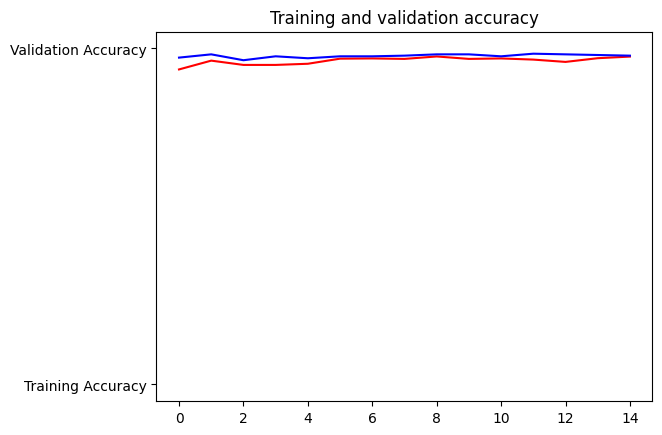

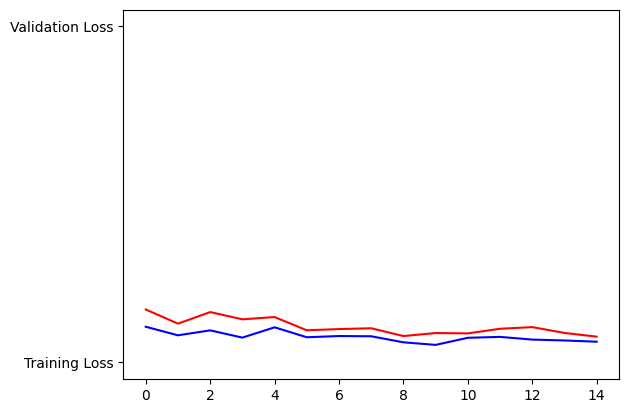

In [ ]:
my_model.summary()
history = my_model.fit(train_generator,
                      epochs=15,
                      validation_data=validation_generator,
                      callbacks=[StopTrainingCallback()]
                       )

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
image = Image.open('/content/dataset/validation/non_alergi/acne (118).jpg')
image = image.resize((56, 56))  # Resize the image to the desired shape

# Convert the image to a NumPy array
image_array = np.array(image)
image_array = image_array[:, :, :3]  # Keep only the first 3 channels (RGB)

# Normalize the pixel values (if needed)
image_array = image_array / 255.0

# Expand dimensions to match the input shape of the model
input_image = np.expand_dims(image_array, axis=0)

# Print the shape of the input image
print('Input Image Shape:', input_image.shape)


predictions = my_model.predict(input_image)
predicted_label = np.argmax(predictions, axis=-1)
print(predicted_label)


Input Image Shape: (1, 56, 56, 3)
1/1 [==============================] - 0s 189ms/step
[1]


In [ ]:
print("Validation accuracy reached the desired threshold. Stopping training.")
saved_model_path = "./mantap.h5"
my_model.save(saved_model_path)

Validation accuracy reached the desired threshold. Stopping training.


# **Using PreTrain Model**

## -Setup

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.resnet import ResNet50, ResNet101, ResNet152
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.densenet import DenseNet201, DenseNet169, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))
incepctionv3_conv = InceptionV3(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))
ResNet152V2_conv = ResNet152V2(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))
DenseNet201_conv = DenseNet201(include_top=False, weights="imagenet", input_tensor=None, input_shape=(input_shape[0], input_shape[1], 3), pooling=None)
DenseNet169_conv = DenseNet169(include_top=False, weights="imagenet", input_tensor=None, input_shape=(input_shape[0], input_shape[1], 3), pooling=None)
DenseNet121_conv = DenseNet121(include_top=False, weights="imagenet", input_tensor=None, input_shape=(input_shape[0], input_shape[1], 3), pooling=None)
Xception_conv = Xception(input_shape=(input_shape[0], input_shape[1], 3), include_top=False, weights="imagenet", input_tensor=None, pooling=None)
ResNet50_conv = ResNet50(input_shape=(input_shape[0], input_shape[1], 3), include_top=False, weights="imagenet", input_tensor=None, pooling=None)
ResNet101_conv = ResNet101(input_shape=(input_shape[0], input_shape[1], 3), include_top=False, weights="imagenet", input_tensor=None, pooling=None)
ResNet152_conv = ResNet152(input_shape=(input_shape[0], input_shape[1], 3), include_top=False, weights="imagenet", input_tensor=None, pooling=None)


## -Model extraction

In [ ]:
def preTrainedModel(conv):
  model = tf.keras.models.Sequential()
  model.add(conv)
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

  # Freeze the layers except the last 4 layers
  for layer in model.layers:
    print(layer)
    layer.trainable = False
      
  # Compile the model
  model.compile(loss='categorical_crossentropy',
                # optimizer= 'SGD',
                optimizer= tf.keras.optimizers.Adam(lr=0.00001),
                # optimizer= tf.keras.optimizers.experimental.RMSprop(lr=0.005),
                metrics=['accuracy'])
  model.summary()   
  return model

## -Training

In [ ]:
# Train the model
listOfPreModel = [DenseNet201_conv]
for x in listOfPreModel:
  model = preTrainedModel(x)
  history = model.fit(train_generator,
                      epochs=10,
                      verbose=1,
                      validation_data=validation_generator)

  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(acc)) # Get number of epochs

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc, 'r', "Training Accuracy")
  plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
  plt.title('Training and validation accuracy')
  plt.show()
  print("")

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss, 'r', "Training Loss")
  plt.plot(epochs, val_loss, 'b', "Validation Loss")
  plt.show()

# **Exporting Model**

In [ ]:
!pip install tensorflow==2.2
!pip uninstall tensorflowjs
!pip install tensorflowjs
%pip install tensorrt
import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflowjs-4.6.0-py3-none-any.whl (85 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
• Using TensorFlow Version: 2.12.0


In [ ]:
saved_model_path = '/content/model_mantap.h5'
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-05-31 07:53:28.486083: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# **Pickle To JSON**

In [ ]:
# import libraries
import pickle
import json
import sys
import os

# open pickle file
with open('/content/jenis_alergi_model.pkl', 'rb') as infile:
    obj = pickle.load(infile)

# convert pickle object to json object
json_obj = json.loads(json.dumps(obj, default=str))

# write the json file
with open('jenis_alergi_model' + '.json', 'w', encoding='utf-8') as outfile:
    json.dump(json_obj, outfile, ensure_ascii=False, indent=4)